# Part II - Ford GoBike System Data Analysis
## by Abdulafeez Adefabi

## Investigation Overview


I looked at how the duration of trips changes with respect to customer type, gender and day of the week. Establishing if there were patterns of trip duration on the different days by user_type or gender.



## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. There are 183412 fordgobike trips in the dataset with 16 fields with some missing values.  
I dropped all missing values from the dataset. Dataset used for this analysis had 174952 observations. I also extracted new fields from existing fields to enrich the analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime, date

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("201902-fordgobike-tripdata.csv")

### Data Extraction and Cleaning

In [4]:
# Drop NaN
df.dropna(inplace = True)

#changing data type of start_time and end_time to datetime.
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

# Extracting the month from start_time and end
month_start = df['start_time'].dt.month
month_end = df['end_time'].dt.month
df['start_month'] = month_start.apply(lambda x: calendar.month_abbr[x])
df['end_month'] = month_end.apply(lambda x: calendar.month_abbr[x])

# Extracting day of the week from start_time
day = df['start_time'].apply(lambda time: time.dayofweek)
day1 = df['end_time'].apply(lambda time: time.dayofweek)
days_week = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['start_day'] = day.map(days_week)
df['end_day'] = day1.map(days_week)

# Convert member_birth_year to interger
df['member_birth_year'] = df['member_birth_year'].astype(int)

# Extracting Age from member_birth_year
today = date.today()
df['age'] = today.year - df['member_birth_year']

 # b. Getting the time of the day the trip started
df['start_hour'] = df['start_time'].apply(lambda time: time.hour)
df['period_day'] = 'morning'
df['period_day'][(df['start_hour'] >= 12) & (df['start_hour'] <= 17)] = 'afternoon'
df['period_day'][(df['start_hour'] >= 18) & (df['start_hour'] <= 23)] = 'night'

# convert time period, month, and weekday into ordered categorical types
time_dict = {'period_day': ['morning', 'afternoon', 'night'],
            'start_day': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
            'end_day': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

for var in time_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = time_dict[var])
    df[var] = df[var].astype(ordered_var)

## (Trips by Day of the Week)

> Thursday had the highest number of trips while saturday had the least trip started.

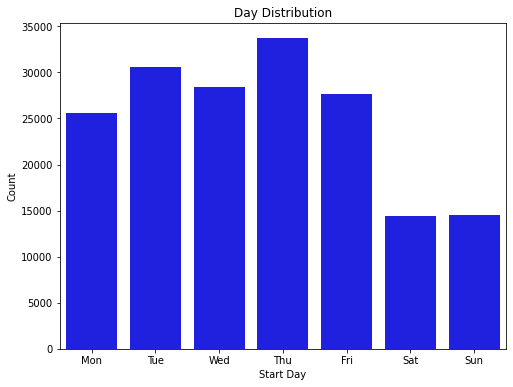

In [10]:
plt.figure(figsize=[8, 6])
sns.countplot(data = df, x ='start_day', color = 'blue')
plt.xlabel('Start Day')
plt.ylabel('Count')
plt.title('Day Distribution');

## (Trips by User_type)

> 91% of the rides had a subscriber account with FordBike. The customers accounted for about 9% of the trips.

Subscriber    0.905311
Customer      0.094689
Name: user_type, dtype: float64


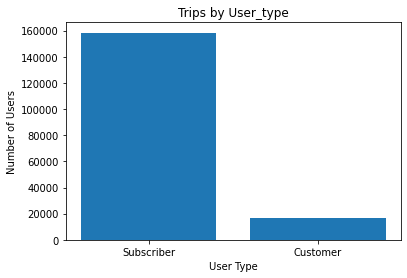

In [12]:
# Proportion of user_types
print(df.user_type.value_counts() / len(df))

# plotting types of users on bar.
plt.bar(x = df.user_type.value_counts().keys(), height = df.user_type.value_counts())
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.title('Trips by User_type');

## (Trips By Gender)

The male gender are the major users of fordgobike, accounting for 75% of users. The female gender had about 23%, and the other gender classification had 2% representation.


Male      0.745919
Female    0.233235
Other     0.020846
Name: member_gender, dtype: float64


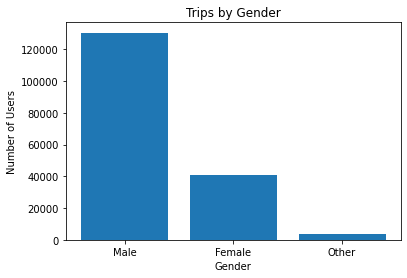

In [14]:
# Proportion of gender
print(df.member_gender.value_counts() / len(df))

# plotting genders on bar.
plt.bar(x = df.member_gender.value_counts().keys(), height = df.member_gender.value_counts())
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.title('Trips by Gender');

## Duration by Days of the week

We deduce that rides take a longer time on weekends than weekdays. One reason for this could be that riders on weekdays used fordbike to commute to work while on weekends, it's more for exercise and leisure.

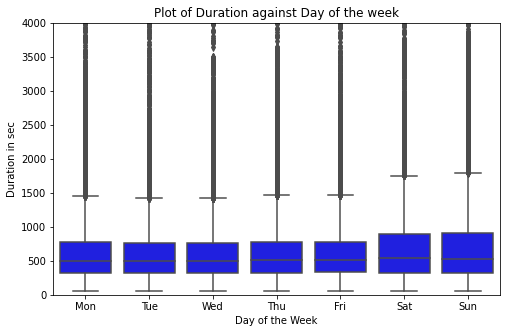

In [15]:
# Setting a limit of 4000secs for duration in secs
# Duration against day of the week
plt.figure(figsize = [8, 5])
sns.boxplot(data = df, x = 'start_day', y = 'duration_sec', color = 'blue')
plt.ylim([0, 4000])
plt.xlabel('Day of the Week')
plt.ylabel('Duration in sec')
plt.title('Plot of Duration against Day of the week');

## Duration by Gender Type

The duration across gender show different distribution. Both the female and other gender cover longer distance than the male gender.

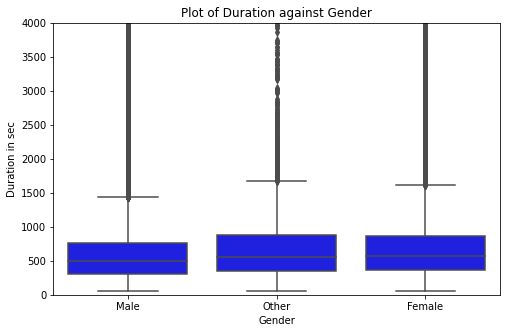

In [16]:
# Duration against gender
plt.figure(figsize = [8, 5])
sns.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = 'blue')
plt.ylim([0, 4000])
plt.xlabel('Gender')
plt.ylabel('Duration in sec')
plt.title('Plot of Duration against Gender');

## Duration by User Type

The customer user_type took longer trips than the subscriber riders. This is could be due to customers probably needed the bikes for a one-off journey that was longer unlike a subscriber who already had a mapped out route.

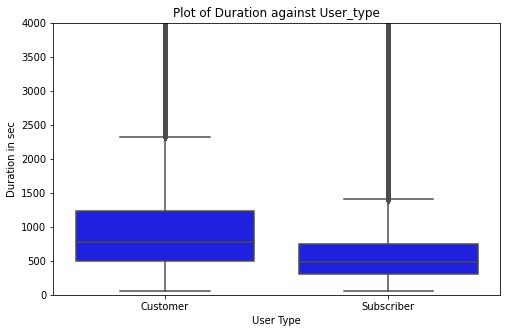

In [17]:
# Duration against user_type
plt.figure(figsize = [8, 5])
sns.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = 'blue')
plt.ylim([0, 4000])
plt.xlabel('User Type')
plt.ylabel('Duration in sec')
plt.title('Plot of Duration against User_type');

## Trip Duration across Days and Customer Types

Customers went on longer trips than the subscribers, visualization show that those trips were not specific to any day. For every day of the week, customers went on longer trips that the subscribers. On average, a customer would spend about 1200 seconds on a trip as compared to 700 seconds from the subscribers. Although, on weekends, trips are longer for both user types.

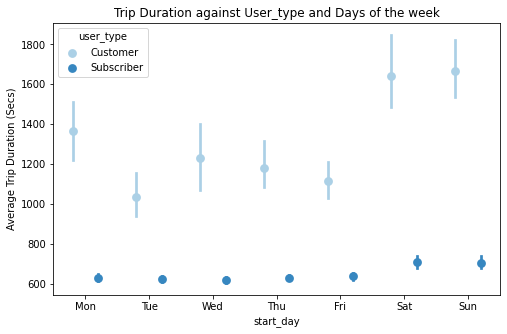

In [21]:
# Usertype, Start_day of trip and duration
plt.figure(figsize = [8, 5])
ax = sns.pointplot(data = df, x ='start_day', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration against User_type and Days of the week')
plt.ylabel('Average Trip Duration (Secs)')
ax.set_yticklabels([],minor = True);

## Trip Duration across Days and Gender

The gender type classified as others have the longest trip duration on all days. We can still see that the female gender took longer than the males on every day of the week in the month of february.

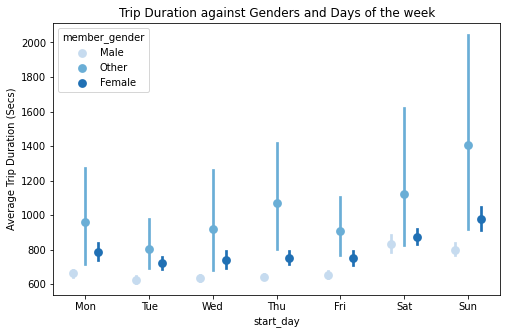

In [22]:
# Usertype, Start_day of trip and duration
plt.figure(figsize = [8, 5])
ax = sns.pointplot(data = df, x ='start_day', y = 'duration_sec', hue = 'member_gender',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration against Genders and Days of the week')
plt.ylabel('Average Trip Duration (Secs)')
ax.set_yticklabels([],minor = True);

## Thank you

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [30]:
! jupyter nbconvert Ford_GoBike_System_Data_Part_2.ipynb --to slides --post serve --no-input --no-prompt

^C
